In [8]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import tensorflow.keras
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
allData = pd.read_csv('../feature_data/features.csv')
allData.replace([np.inf, -np.inf], np.nan, inplace=True)
allData = allData.dropna()
X = allData.drop(["label"],axis=1)
X = X.drop(["radius"],axis=1)
cols = X.keys()

#normalize data
#X = preprocessing.normalize(X, norm='max')

#labels
y = allData["label"]

#features
X = pd.DataFrame(X, columns = cols)

In [10]:
X.describe()

,num_points,std,avg_median_dev,width,linearity,circularity,boundary_length,boundary_regularity,mean_curvature,ang_diff,iav,std_iav,distance,dist_num_points,occluded_right,occluded_left
count,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9.489000e+03,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000
mean,17.307936,0.145534,0.123339,0.442383,19.646191,1.498107e-01,0.534513,0.017417,19.784566,2.237601,2.627493,1.561736,2.957513,0.440747,0.783644,0.722942
std,27.506733,0.233990,0.205220,0.791545,158.022617,1.136570e+00,0.933008,0.012034,18.819969,0.623728,0.718840,0.519241,1.900385,0.528611,0.411781,0.447569
min,3.000000,0.008048,0.005680,0.012648,0.000076,8.969470e-16,0.017039,0.002987,0.045276,0.186256,0.421913,0.273109,0.289371,0.002502,0.000000,0.000000
25%,6.000000,0.038555,0.031740,0.101891,0.006914,1.677530e-04,0.130319,0.008200,5.679890,1.890190,2.219300,1.202750,1.478220,0.101666,1.000000,0.000000
50%,9.000000,0.056707,0.045411,0.144635,0.025590,8.454680e-04,0.195660,0.013237,13.218500,2.376490,2.777150,1.578390,2.345690,0.244998,1.000000,1.000000
75%,17.000000,0.134151,0.118170,0.380985,0.823912,5.842730e-03,0.525086,0.024435,28.153900,2.733730,3.127850,1.915240,4.034960,0.561094,1.000000,1.000000
max,279.000000,3.033200,2.481590,12.762600,3971.650000,2.965000e+01,12.889000,0.072851,123.093000,3.127740,4.565440,3.304990,7.458060,2.482980,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
(949, 16)


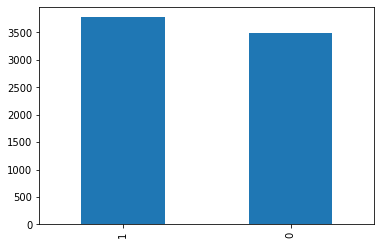

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)
print(type(X_test))
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=5)
y_train.value_counts().plot.bar()

print(X_test.shape)
#oversample the minority
y_train.value_counts().plot.bar()

ros = RandomOverSampler(sampling_strategy="minority", random_state=5)
#X_train, y_train = ros.fit_resample(X_train, y_train)

#y_train.value_counts().plot.bar()
#y_test.value_counts().plot.bar()

In [5]:
# originally saved version

def NN_Model(units = 32, dropout=0.2, optimizer = 'adam'):
    model = models.Sequential()
    model.add(tensorflow.keras.Input(shape=(16,)))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(layers.Dense(units = units, activation='leaky_relu',))

    model.add(layers.Dense(units = units, activation='leaky_relu',))
    
    model.add(layers.Dense(units = units*2, activation='leaky_relu'))

    model.add(layers.Dense(units = units*4, activation='leaky_relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    return model
    

In [12]:
# test 1
def NN_Model(units = 32):
    model = models.Sequential()
    model.add(tensorflow.keras.Input(shape=(16,)))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(layers.Dense(units = units, activation='leaky_relu',))

    model.add(layers.Dense(units = units, activation='leaky_relu'))

    model.add(layers.Dense(units = units*2, activation='leaky_relu',))
    
    model.add(layers.Dense(units = units*4, activation='leaky_relu'))


    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    return model

In [7]:
# test 2
def NN_Model(units = 32):
    model = models.Sequential()
    model.add(tensorflow.keras.Input(shape=(16,)))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(layers.Dense(units = units, activation='leaky_relu',))

    model.add(layers.Dense(units = units, activation='leaky_relu',))

    model.add(layers.Dense(units = units*2, activation='leaky_relu',))
    
    model.add(layers.Dense(units = units*4, activation='leaky_relu'))

    #model.add(layers.Dense(units = units, activation='leaky_relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    return model

In [18]:
ms = []
hs = []
for f in [16,32,64]:
    #for d in [0.15,0.2,0.25,0.3]:
    #    if (f == 32 and d == 0.2) or (f==64 and d==0.15) or (f==96 and d!=0.2):
    model = NN_Model(units=f)
    model.summary()
    ms.append(model)
    history = model.fit(X_train, y_train, epochs=150, 
                    validation_data=(X_val, y_val))
    #loc = "../models/NN_test_"+str(f)+".h5"
    #model.save(loc)
    hs.append(history)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                      

227/227 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9581 - val_loss: 0.0948 - val_accuracy: 0.9633
Epoch 50/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1080 - accuracy: 0.9551 - val_loss: 0.0976 - val_accuracy: 0.9602
Epoch 51/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9566 - val_loss: 0.1016 - val_accuracy: 0.9594
Epoch 52/150
227/227 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.9598 - val_loss: 0.0971 - val_accuracy: 0.9649
Epoch 53/150
227/227 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9577 - val_loss: 0.0983 - val_accuracy: 0.9610
Epoch 54/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9580 - val_loss: 0.0979 - val_accuracy: 0.9617
Epoch 55/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9596 - val_loss: 0.1076 - val_accuracy: 0.9563
Epoch

Epoch 106/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.9627 - val_loss: 0.0908 - val_accuracy: 0.9680
Epoch 107/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9610 - val_loss: 0.0923 - val_accuracy: 0.9664
Epoch 108/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0931 - accuracy: 0.9628 - val_loss: 0.0951 - val_accuracy: 0.9649
Epoch 109/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0981 - accuracy: 0.9623 - val_loss: 0.0917 - val_accuracy: 0.9633
Epoch 110/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0958 - accuracy: 0.9598 - val_loss: 0.0950 - val_accuracy: 0.9625
Epoch 111/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9640 - val_loss: 0.0940 - val_accuracy: 0.9688
Epoch 112/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0950 - accuracy: 0.9606 - val_loss: 0.0971 - val_ac

Epoch 4/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1414 - accuracy: 0.9398 - val_loss: 0.1245 - val_accuracy: 0.9461
Epoch 5/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1297 - accuracy: 0.9460 - val_loss: 0.1130 - val_accuracy: 0.9563
Epoch 6/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1270 - accuracy: 0.9454 - val_loss: 0.1074 - val_accuracy: 0.9516
Epoch 7/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9482 - val_loss: 0.1001 - val_accuracy: 0.9594
Epoch 8/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.9474 - val_loss: 0.1055 - val_accuracy: 0.9547
Epoch 9/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9470 - val_loss: 0.1142 - val_accuracy: 0.9547
Epoch 10/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1252 - accuracy: 0.9475 - val_loss: 0.1065 - val_accuracy: 0.952

Epoch 61/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9614 - val_loss: 0.0858 - val_accuracy: 0.9680
Epoch 62/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9618 - val_loss: 0.0879 - val_accuracy: 0.9664
Epoch 63/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9625 - val_loss: 0.0865 - val_accuracy: 0.9703
Epoch 64/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0978 - accuracy: 0.9603 - val_loss: 0.0868 - val_accuracy: 0.9688
Epoch 65/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0971 - accuracy: 0.9621 - val_loss: 0.0924 - val_accuracy: 0.9664
Epoch 66/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9603 - val_loss: 0.0940 - val_accuracy: 0.9649
Epoch 67/150
227/227 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9647 - val_loss: 0.0879 - val_accuracy:

Epoch 118/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9643 - val_loss: 0.0799 - val_accuracy: 0.9696
Epoch 119/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9661 - val_loss: 0.0825 - val_accuracy: 0.9703
Epoch 120/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9634 - val_loss: 0.0842 - val_accuracy: 0.9711
Epoch 121/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0846 - accuracy: 0.9651 - val_loss: 0.0857 - val_accuracy: 0.9657
Epoch 122/150
227/227 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9668 - val_loss: 0.0828 - val_accuracy: 0.9688
Epoch 123/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9642 - val_loss: 0.0941 - val_accuracy: 0.9641
Epoch 124/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9660 - val_loss: 0.0853 - val_ac

Epoch 16/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1089 - accuracy: 0.9522 - val_loss: 0.0940 - val_accuracy: 0.9602
Epoch 17/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1094 - accuracy: 0.9543 - val_loss: 0.0912 - val_accuracy: 0.9672
Epoch 18/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9533 - val_loss: 0.0894 - val_accuracy: 0.9719
Epoch 19/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1111 - accuracy: 0.9554 - val_loss: 0.0904 - val_accuracy: 0.9649
Epoch 20/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9556 - val_loss: 0.0888 - val_accuracy: 0.9664
Epoch 21/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1072 - accuracy: 0.9572 - val_loss: 0.0883 - val_accuracy: 0.9711
Epoch 22/150
227/227 [==============================] - 1s 2ms/step - loss: 0.1063 - accuracy: 0.9559 - val_loss: 0.0878 - val_accuracy:

Epoch 73/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9662 - val_loss: 0.0892 - val_accuracy: 0.9688
Epoch 74/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9656 - val_loss: 0.0958 - val_accuracy: 0.9664
Epoch 75/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9661 - val_loss: 0.0808 - val_accuracy: 0.9672
Epoch 76/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9679 - val_loss: 0.0943 - val_accuracy: 0.9680
Epoch 77/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9650 - val_loss: 0.0795 - val_accuracy: 0.9719
Epoch 78/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9668 - val_loss: 0.0814 - val_accuracy: 0.9742
Epoch 79/150
227/227 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9645 - val_loss: 0.0830 - val_accuracy:

Epoch 130/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0746 - accuracy: 0.9694 - val_loss: 0.0972 - val_accuracy: 0.9641
Epoch 131/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0772 - accuracy: 0.9709 - val_loss: 0.0915 - val_accuracy: 0.9641
Epoch 132/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.9685 - val_loss: 0.0911 - val_accuracy: 0.9672
Epoch 133/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9694 - val_loss: 0.0818 - val_accuracy: 0.9664
Epoch 134/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9720 - val_loss: 0.0887 - val_accuracy: 0.9703
Epoch 135/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0757 - accuracy: 0.9696 - val_loss: 0.0862 - val_accuracy: 0.9672
Epoch 136/150
227/227 [==============================] - 1s 3ms/step - loss: 0.0745 - accuracy: 0.9687 - val_loss: 0.0801 - val_ac

30/30 - 0s - loss: 0.0890 - accuracy: 0.9694 - 49ms/epoch - 2ms/step
Test Loss: 0.08900036662817001
Test Accuracy: 0.9694415330886841


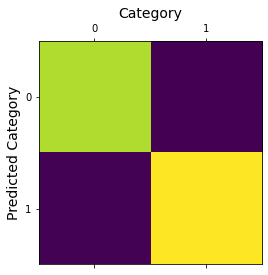

              precision    recall  f1-score   support

           0     0.9708    0.9643    0.9675       448
           1     0.9683    0.9741    0.9711       501

    accuracy                         0.9694       949
   macro avg     0.9695    0.9692    0.9693       949
weighted avg     0.9694    0.9694    0.9694       949

30/30 - 0s - loss: 0.0961 - accuracy: 0.9694 - 48ms/epoch - 2ms/step
Test Loss: 0.09608025848865509
Test Accuracy: 0.9694415330886841


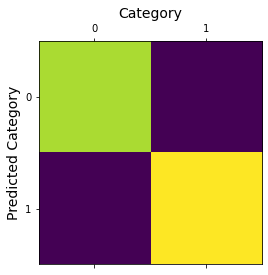

              precision    recall  f1-score   support

           0     0.9663    0.9685    0.9674       444
           1     0.9722    0.9703    0.9713       505

    accuracy                         0.9694       949
   macro avg     0.9693    0.9694    0.9693       949
weighted avg     0.9694    0.9694    0.9694       949

30/30 - 0s - loss: 0.0879 - accuracy: 0.9694 - 56ms/epoch - 2ms/step
Test Loss: 0.08790816366672516
Test Accuracy: 0.9694415330886841


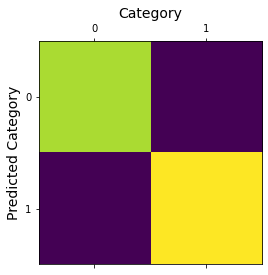

              precision    recall  f1-score   support

           0     0.9663    0.9685    0.9674       444
           1     0.9722    0.9703    0.9713       505

    accuracy                         0.9694       949
   macro avg     0.9693    0.9694    0.9693       949
weighted avg     0.9694    0.9694    0.9694       949



In [19]:
for m in ms:
    test_loss, test_acc = m.evaluate(X_test,  y_test, verbose=2)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    y_pred = m.predict(X_test)
    a = []
    for x in y_pred:
        a.append(1 if x[0] > 0.5 else 0)
    y_pred = pd.Series(a)
    plt.matshow(confusion_matrix(y_test, y_pred, labels=[0,1]))
    plt.ylabel("Predicted Category", fontsize=14)
    plt.title("Category", fontsize=14)
    plt.show()
    print(classification_report(y_pred,y_test,digits=4))

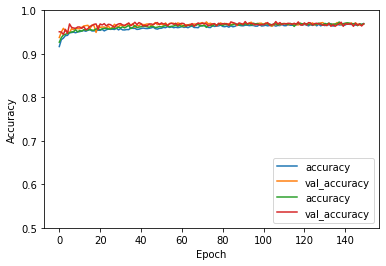

In [10]:
for i in range(len(hs)):
    plt.plot(hs[i].history['accuracy'], label='accuracy')
    plt.plot(hs[i].history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
